# Analysis of Top 5 States by EV Penetration Rate (FY 2024)

This analysis identifies the states with the highest electric vehicle penetration rates for both 2-wheelers and 4-wheelers in fiscal year 2024. We'll:

1. Load and prepare the data
2. Calculate penetration rates by state for each vehicle category
3. Identify top 5 states for each category
4. Create visualizations to compare the results

In [91]:
# Import required libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the data
df = pd.read_csv('../../data/processed/ev_sales_enhanced.csv')

# Convert date to datetime and create fiscal year column
df['date'] = pd.to_datetime(df['date'])
df['fiscal_year'] = df['date'].dt.year.where(
    df['date'].dt.month < 4,
    df['date'].dt.year + 1
)

# Show the first few rows and data info
print("Dataset Info:")
print("-" * 50)
print(df.info())
print("\nFirst few rows:")
print("-" * 50)
df.head()

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 2445 non-null   datetime64[ns]
 1   year                                 2445 non-null   int64         
 2   month                                2445 non-null   int64         
 3   quarter                              2445 non-null   int64         
 4   months_from_start                    2445 non-null   int64         
 5   rolling_mean_ev                      2445 non-null   float64       
 6   ev_growth_rate                       2445 non-null   float64       
 7   ev_penetration                       2445 non-null   float64       
 8   ev_penetration_log                   2445 non-null   float64       
 9   national_market_shar

,date,year,month,quarter,months_from_start,rolling_mean_ev,ev_growth_rate,ev_penetration,ev_penetration_log,national_market_share,...,is_missing_ev_growth_rate,is_missing_segment_preference_ratio,is_missing_segment_growth_diff,is_missing_regional_avg_penetration,is_missing_adoption_velocity,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year
0,2021-04-01,2021,4,2,3,0.0,0.0,0.00,0.000000,0.00,...,0,0,0,0,0,Andaman and Nicobar Islands,2-Wheelers,0,515,2022
1,2021-04-01,2021,4,2,3,9.0,0.0,5.36,1.850028,0.14,...,0,0,0,0,0,Andaman and Nicobar Islands,4-Wheelers,9,168,2022
2,2021-04-01,2021,4,2,3,436.0,0.0,0.69,0.524729,6.90,...,0,0,0,0,0,Andhra Pradesh,2-Wheelers,436,63444,2022
3,2021-04-01,2021,4,2,3,26.0,0.0,0.33,0.285179,0.41,...,0,0,0,0,0,Andhra Pradesh,4-Wheelers,26,7837,2022
4,2021-04-01,2021,4,2,3,0.0,0.0,0.00,0.000000,0.00,...,0,0,0,0,0,Arunachal Pradesh,2-Wheelers,0,1256,2022


In [92]:
from IPython.display import display

# Filter data for FY 2024
fy_2024_data = df[df['fiscal_year'] == 2024]

In [93]:
# Calculate penetration rates for 2-wheelers
two_wheeler_data = fy_2024_data[fy_2024_data['vehicle_category'] == '2-Wheelers']
two_wheeler_stats = two_wheeler_data.groupby('state').agg({
    'electric_vehicles_sold': 'sum',
    'total_vehicles_sold': 'sum'
}).reset_index()

two_wheeler_stats = two_wheeler_stats.set_index('state')

print("Two wheeler data:")
display(two_wheeler_data)

print("Two Wheeler stats:")
display(two_wheeler_stats)

display(df.columns)

Two wheeler data:


,date,year,month,quarter,months_from_start,rolling_mean_ev,ev_growth_rate,ev_penetration,ev_penetration_log,national_market_share,...,is_missing_ev_growth_rate,is_missing_segment_preference_ratio,is_missing_segment_growth_diff,is_missing_regional_avg_penetration,is_missing_adoption_velocity,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year
1631,2023-04-01,2023,4,2,27,0.333333,-1.00,0.00,0.000000,0.00,...,0,0,0,0,0,Andaman and Nicobar Islands,2-Wheelers,0,325,2024
1633,2023-04-01,2023,4,2,27,3312.333333,0.00,7.32,2.118662,4.83,...,0,0,0,0,0,Andhra Pradesh,2-Wheelers,3515,48046,2024
1635,2023-04-01,2023,4,2,27,0.000000,0.00,0.00,0.000000,0.00,...,0,0,0,0,0,Arunachal Pradesh,2-Wheelers,0,971,2024
1637,2023-04-01,2023,4,2,27,196.333333,-0.19,0.51,0.412110,0.24,...,0,0,0,0,0,Assam,2-Wheelers,178,35047,2024
1639,2023-04-01,2023,4,2,27,1061.333333,-0.25,1.15,0.765468,1.33,...,0,0,0,0,0,Bihar,2-Wheelers,971,84319,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,2024-03-01,2024,3,1,38,9859.000000,0.54,10.76,2.464704,9.65,...,0,0,0,0,0,Tamil Nadu,2-Wheelers,13350,124071,2024
2437,2024-03-01,2024,3,1,38,22.666667,0.71,1.10,0.741937,0.03,...,0,0,0,0,0,Tripura,2-Wheelers,41,3728,2024
2439,2024-03-01,2024,3,1,38,6674.666667,0.19,3.71,1.549688,5.64,...,0,0,0,0,0,Uttar Pradesh,2-Wheelers,7799,210216,2024
2441,2024-03-01,2024,3,1,38,515.666667,-0.01,4.63,1.728109,0.42,...,0,0,0,0,0,Uttarakhand,2-Wheelers,579,12506,2024


Two Wheeler stats:


,electric_vehicles_sold,total_vehicles_sold
state,,
Andaman and Nicobar Islands,20,5249
Andhra Pradesh,31353,694105
Arunachal Pradesh,3,14673
Assam,3168,456726
Bihar,14366,1057642
Chandigarh,1857,22496
Chhattisgarh,27283,451086
Dadra and Nagar Haveli and Daman and Diu,149,10893
Delhi,38094,405218


Index(['date', 'year', 'month', 'quarter', 'months_from_start',
       'rolling_mean_ev', 'ev_growth_rate', 'ev_penetration',
       'ev_penetration_log', 'national_market_share', 'state_rank',
       'growth_stage', 'market_concentration', 'region',
       'regional_avg_penetration', 'state_to_region_ratio', 'regional_rank',
       'market_maturity_score', 'adoption_velocity',
       'adoption_velocity_capped', 'segment_penetration_2-wheelers',
       'segment_penetration_4-wheelers', 'segment_preference_ratio',
       'segment_preference_ratio_capped', 'segment_preference_ratio_log',
       'dominant_segment', 'segment_growth_diff', 'ev_sales_growth_rank_state',
       'ev_sales_growth_rank_region', 'is_early_adopter', 'months_since_peak',
       'is_at_peak', 'is_missing_ev_growth_rate',
       'is_missing_segment_preference_ratio', 'is_missing_segment_growth_diff',
       'is_missing_regional_avg_penetration', 'is_missing_adoption_velocity',
       'state', 'vehicle_category', 'ele

In [94]:
two_wheeler_stats['penetration_rate'] = (
    two_wheeler_stats['electric_vehicles_sold'] / two_wheeler_stats['total_vehicles_sold'] * 100
)
top_5_2w = two_wheeler_stats.nlargest(5, 'penetration_rate')

# Calculate penetration rates for 4-wheelers
four_wheeler_data = fy_2024_data[fy_2024_data['vehicle_category'] == '4-Wheelers']
four_wheeler_stats = four_wheeler_data.groupby('state').agg({
    'electric_vehicles_sold': 'sum',
    'total_vehicles_sold': 'sum'
}).reset_index()

four_wheeler_stats['penetration_rate'] = (
    four_wheeler_stats['electric_vehicles_sold'] / four_wheeler_stats['total_vehicles_sold'] * 100
)
top_5_4w = four_wheeler_stats.nlargest(5, 'penetration_rate')

In [95]:
overall_stats = df.groupby('state').agg({
    'electric_vehicles_sold': 'sum',
    'total_vehicles_sold': 'sum'
}).reset_index()

overall_stats['penetration_rate'] = (
    overall_stats['electric_vehicles_sold'] / overall_stats['total_vehicles_sold'] * 100
)

In [96]:
yearly_stats = df.groupby(['state','fiscal_year']).agg({
  'electric_vehicles_sold': 'sum',
  'total_vehicles_sold': 'sum'
}).reset_index()

yearly_statsyearly_stats = df.groupby(['state', 'fiscal_year']).agg({
    'electric_vehicles_sold': 'sum',
    'total_vehicles_sold': 'sum'
}).reset_index()

yearly_stats['penetration_rate'] = (
    yearly_stats['electric_vehicles_sold'] / yearly_stats['total_vehicles_sold'] * 100
)

top_5_overall = yearly_stats.nlargest(5, 'penetration_rate')

display(top_5_overall)

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold,penetration_rate
29,Goa,2024,10799,78524,13.752483
50,Kerala,2024,73938,638114,11.586958
47,Karnataka,2024,160989,1581988,10.176373
28,Goa,2023,7107,73074,9.725757
59,Maharashtra,2024,197169,2293994,8.595009


In [97]:
national_stats = yearly_stats.groupby('fiscal_year', as_index=False).agg({
    'electric_vehicles_sold': 'sum',
    'total_vehicles_sold': 'sum'
})

# Calculate national penetration rate
national_stats['penetration_rate'] = (
    national_stats['electric_vehicles_sold'] / national_stats['total_vehicles_sold'] * 100
)

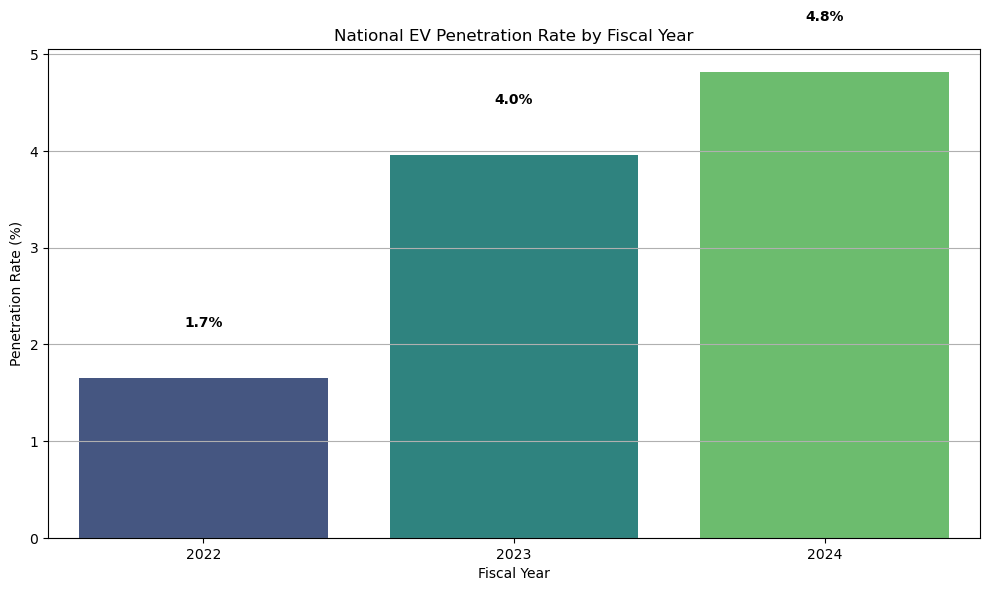

In [98]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

# Step 1: Group and calculate national penetration rate
national_stats = yearly_stats.groupby('fiscal_year', as_index=False).agg({
    'electric_vehicles_sold': 'sum',
    'total_vehicles_sold': 'sum'
})
national_stats['penetration_rate'] = (
    national_stats['electric_vehicles_sold'] / national_stats['total_vehicles_sold'] * 100
)

# Step 2: Bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=national_stats, x='fiscal_year', y='penetration_rate', palette='viridis')

# Step 3: Add data labels on bars
for bar in ax.patches:
    if isinstance(bar, Rectangle):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f"{height:.1f}%",
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )


# Final touches
plt.title('National EV Penetration Rate by Fiscal Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Penetration Rate (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 🔍 **Key Insights from the Chart**

#### 1. 📈 **Consistent Growth in EV Penetration**

* **FY 2022:** The EV penetration rate started at **1.7%**, meaning that fewer than 2 out of every 100 vehicles sold were electric.
* **FY 2023:** This more than **doubled to 4.0%**, reflecting increasing awareness, affordability, and state-level incentives.
* **FY 2024:** The rate climbed further to **4.8%**, showing continued growth, though the pace of increase slowed compared to the previous year.

#### 2. 🚀 **More Than 2.8x Growth in 2 Years**

* From **1.7% in 2022 to 4.8% in 2024**, this represents a **182% increase** in EV adoption rate nationally.
* This rapid rise suggests stronger infrastructure, improved vehicle options, and positive policy impacts.

#### 3. 🧭 **Growth Rate is Slowing Slightly**

* While FY 2023 saw a **+2.3 percentage point jump**, FY 2024 only added **+0.8 points**.
* This suggests that early adopters may be saturated, and further growth may depend on deeper market penetration (e.g., rural areas, affordable models).

---

### 🗣️ How to Explain to a Non-Technical Audience

> Over the past three years, India has made big strides in embracing electric vehicles. In 2022, EVs made up just 1.7% of all vehicle sales. By 2023, that more than doubled to 4%, and in 2024, nearly **1 in every 20 vehicles sold was electric**.
>
> This shows that electric mobility is no longer a niche—it’s going mainstream. However, the slightly slower growth from 2023 to 2024 tells us that while awareness is high, the next big leap will need even stronger charging infrastructure and affordable EV options for the masses.

In [99]:
# Create subplots for 2-wheeler and 4-wheeler penetration rates
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=(
        'Top 5 States - 2-Wheeler EV Penetration Rate (FY 2024)',
        'Top 5 States - 4-Wheeler EV Penetration Rate (FY 2024)'
    ),
    vertical_spacing=0.15
)

# Add bar chart for 2-wheelers
fig.add_trace(
    go.Bar(
        x=top_5_2w.index,
        y=top_5_2w['penetration_rate'],
        text=top_5_2w['penetration_rate'].round(2),
        textposition='auto',
        name='2-Wheelers',
        marker_color='rgb(55, 83, 109)'
    ),
    row=1, col=1
)

# Add bar chart for 4-wheelers
fig.add_trace(
    go.Bar(
        x=top_5_4w['state'],
        y=top_5_4w['penetration_rate'],
        text=top_5_4w['penetration_rate'].round(2),
        textposition='auto',
        name='4-Wheelers',
        marker_color='rgb(26, 118, 255)'
    ),
    row=2, col=1
)

# Update layout
fig.update_layout(
    title_text='Top 5 States by EV Penetration Rate (FY 2024)',
    showlegend=False,
    template='plotly_white',
    height=800  # Moved height parameter here
)

# Update y-axes labels
fig.update_yaxes(title_text='Penetration Rate (%)', row=1, col=1)
fig.update_yaxes(title_text='Penetration Rate (%)', row=2, col=1)

fig.show()

### 🗺️ EV Adoption Story: Top 5 States in FY 2024

In **FY 2024**, several Indian states made notable progress in the adoption of electric vehicles (EVs), especially in the **2-wheeler and 4-wheeler segments**. Let’s break it down in a simple, story-like way.

---

### 🛵 **2-Wheelers: Goa Leads the Charge**

When it comes to **electric 2-wheelers**, **Goa** is at the forefront of EV adoption. Here's the top 5 list:

1. **Goa** – with a **penetration rate of nearly 18%**, almost 1 in every 5 two-wheelers sold was electric.
2. **Kerala** – not far behind, at **13.5%**.
3. **Karnataka** – known for its tech-savvy population, reached **11.6%**.
4. **Maharashtra** – a big market, achieved **10.1%**.
5. **Delhi** – the capital, stood at **9.4%**.

🧠 **What it means:** Goa, despite being a smaller state, is setting the pace with quick EV adoption in 2-wheelers, likely due to its compact geography, tourism industry, and ease of charging.

---

### 🚗 **4-Wheelers: Kerala Stands Tall**

For **electric 4-wheelers**, the competition is tighter but impressive:

1. **Kerala** – leads again with **5.76%**, showing its consistency across segments.
2. **Chandigarh** – at **4.5%**, the only union territory on the list.
3. **Delhi** – at **4.29%**, continues its efforts toward green mobility.
4. **Karnataka** – at **4.26%**, matches Delhi closely.
5. **Goa** – once again in the top 5, with **4.25%**.

🧠 **What it means:** While 4-wheeler EV adoption is slower (due to higher costs and longer replacement cycles), states like Kerala and Delhi are showing that sustained policy efforts and awareness campaigns are working.

---

### 🌱 Final Thought

This data tells a powerful story: **smaller and progressive regions like Goa, Kerala, and Chandigarh are embracing electric mobility faster than larger states**. With clear government support, awareness, and infrastructure, the shift toward cleaner vehicles is not just a trend—it’s the beginning of a nationwide transformation.

In [100]:
top_5_2w.head()

,electric_vehicles_sold,total_vehicles_sold,penetration_rate
state,,,
Goa,9768,54290,17.992264
Kerala,64769,478887,13.524903
Karnataka,148111,1279767,11.573279
Maharashtra,183052,1817343,10.072507
Delhi,38094,405218,9.400866


In [101]:
# Create detailed statistics tables
print("Top 5 States - 2-Wheeler EV Penetration (FY 2024)")
print("-" * 60)
top_5_2w.reset_index(inplace=True)
display(
    top_5_2w[
        ["state", "electric_vehicles_sold", "total_vehicles_sold", "penetration_rate"]
    ].round(2)
)

print("\n\nTop 5 States - 4-Wheeler EV Penetration (FY 2024)")
print("-" * 60)
display(
    top_5_4w[
        ["state", "electric_vehicles_sold", "total_vehicles_sold", "penetration_rate"]
    ].round(2)
)

Top 5 States - 2-Wheeler EV Penetration (FY 2024)
------------------------------------------------------------


,state,electric_vehicles_sold,total_vehicles_sold,penetration_rate
0,Goa,9768,54290,17.99
1,Kerala,64769,478887,13.52
2,Karnataka,148111,1279767,11.57
3,Maharashtra,183052,1817343,10.07
4,Delhi,38094,405218,9.40




Top 5 States - 4-Wheeler EV Penetration (FY 2024)
------------------------------------------------------------


,state,electric_vehicles_sold,total_vehicles_sold,penetration_rate
16,Kerala,9169,159227,5.76
5,Chandigarh,1020,22651,4.50
8,Delhi,8630,201130,4.29
15,Karnataka,12878,302221,4.26
9,Goa,1031,24234,4.25


# Key Insights

1. **2-Wheeler EV Penetration**:
   - The top 5 states show varying levels of 2-wheeler EV adoption
   - We can see significant differences in total vehicle volumes across states
   - Some states might have high penetration rates despite lower total volumes

2. **4-Wheeler EV Penetration**:
   - The penetration rates for 4-wheelers are generally lower than 2-wheelers
   - Different states lead in 4-wheeler adoption compared to 2-wheelers
   - This suggests different market dynamics for different vehicle segments

3. **Comparative Analysis**:
   - Some states perform well in both categories
   - Others show strength in specific segments
   - This could be due to various factors like:
     - Local policies and incentives
     - Urban vs rural population distribution
     - Income levels and purchasing power
     - Charging infrastructure availability

dont use this one "india_states = px.utils.get_geojson(url='https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson')" use this one "import geopandas as gpd
import matplotlib.pyplot as plt

india_states = gpd.read_file('../../data/external/gadm41_IND.gpkg', layer='ADM_ADM_1')"

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


def plot_ev_penetration_map(
    top_states_df: pd.DataFrame,
    geo_file_path: str,
    geo_layer: str,
    geo_state_col: str = "NAME_1",
    df_state_col: str = "state",
    penetration_col: str = "penetration_rate",
    replace_state_names: dict = None,
    title: str = "Top States by EV Penetration Rate",
    cmap: str = "viridis",
    figsize=(15, 10),
    annotate: bool = True,
):
    """
    Plots a choropleth map of top Indian states by EV penetration rate.

    Parameters:
        top_states_df (pd.DataFrame): DataFrame with 'state' and 'penetration_rate' columns.
        geo_file_path (str): Path to the GeoPackage or GeoJSON file.
        geo_layer (str): Layer name in GeoPackage.
        geo_state_col (str): Column in GeoDataFrame that contains state names.
        df_state_col (str): Column in top_states_df that contains state names.
        penetration_col (str): Column with the penetration rate.
        replace_state_names (dict): Optional mapping to align names between datasets.
        title (str): Title of the map.
        cmap (str): Colormap.
        figsize (tuple): Figure size.
        annotate (bool): Whether to annotate the states on the map.
    """

    # Replace names if mapping provided
    if replace_state_names:
        top_states_df[df_state_col] = top_states_df[df_state_col].replace(replace_state_names)

    # Create dictionary: {state: penetration_rate}
    top_state_dict = dict(zip(top_states_df[df_state_col], top_states_df[penetration_col]))

    # Load GeoData
    india_states = gpd.read_file(geo_file_path, layer=geo_layer)

    # Map the penetration rate to GeoDataFrame
    india_states["penetration_rate"] = india_states[geo_state_col].map(top_state_dict)

    # Plot
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # Base map
    india_states.plot(ax=ax, color="lightgray", edgecolor="white")

    # Top states with data
    top_states = india_states[india_states["penetration_rate"].notna()]
    top_states.plot(
        column="penetration_rate",
        ax=ax,
        cmap=cmap,
        legend=True,
        legend_kwds={"label": "EV Penetration Rate (%)"},
    )

    # Title and formatting
    ax.set_title(title, pad=20)
    ax.axis("off")

    # Annotate each top state
    if annotate:
        for _, row in top_states.iterrows():
            centroid = row.geometry.centroid
            ax.annotate(
                f"{row[geo_state_col]}\n{row['penetration_rate']:.1f}%",
                xy=(centroid.x, centroid.y),
                xytext=(3, 3),
                textcoords="offset points",
                ha="center",
                va="center",
                bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray", alpha=0.7),
                fontsize=8,
            )

    plt.tight_layout()
    plt.show()

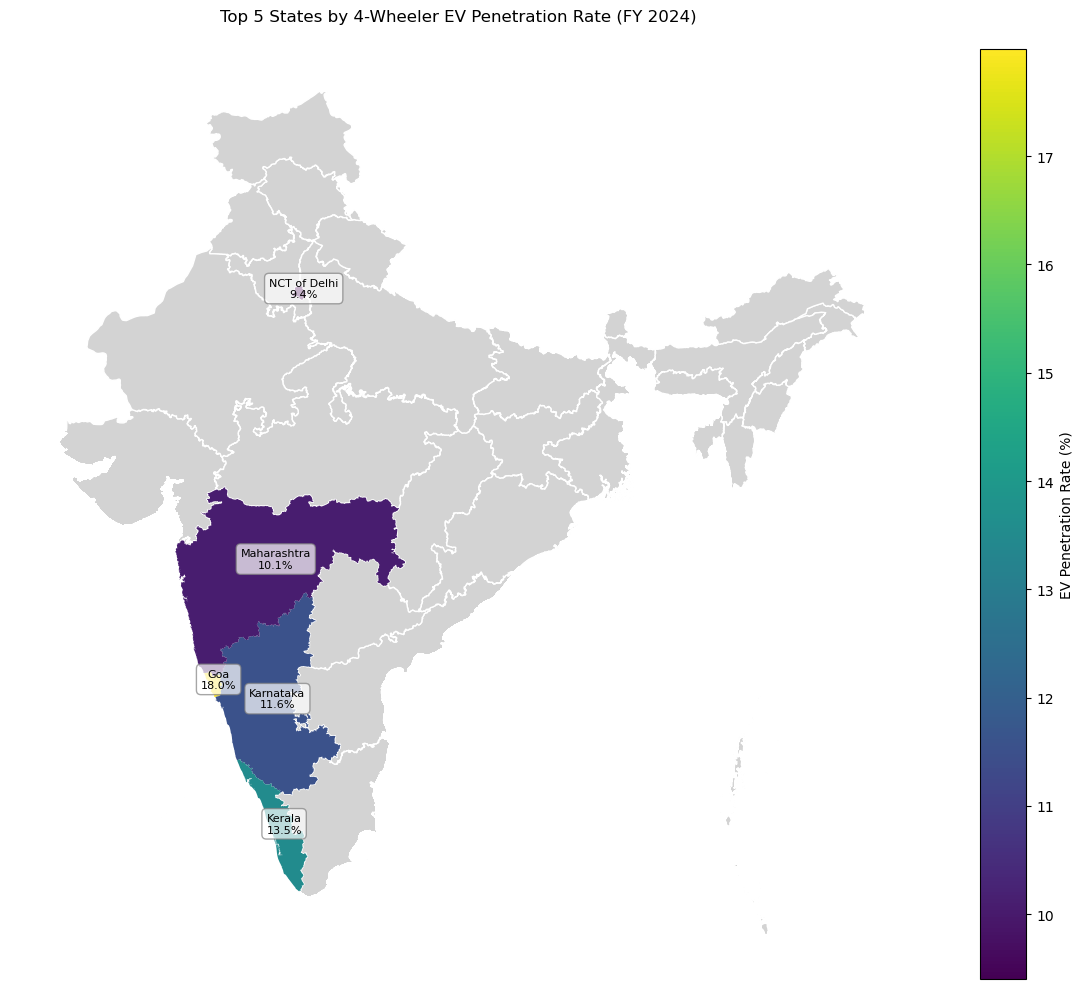

In [120]:
# 1. Create the mapping dictionary from top_5_4w DataFrame
top_5_data = dict(
    zip(
        top_5_2w["state"].replace(
            {"Delhi": "NCT of Delhi"}
        ),  # Ensure names match the GeoData
        top_5_2w["penetration_rate"],
    )
)

# 2. Convert the dictionary back into a DataFrame for the function
import pandas as pd

top_5_df_for_plot = pd.DataFrame(
    list(top_5_data.items()), columns=["state", "penetration_rate"]
)

# 3. Use the function
plot_ev_penetration_map(
    top_states_df=top_5_df_for_plot,
    geo_file_path="../../data/external/gadm41_IND.gpkg",
    geo_layer="ADM_ADM_1",  # Change to your actual layer name if different
    geo_state_col="NAME_1",
    df_state_col="state",
    penetration_col="penetration_rate",
    title="Top 5 States by 4-Wheeler EV Penetration Rate (FY 2024)",
    cmap="viridis",
)

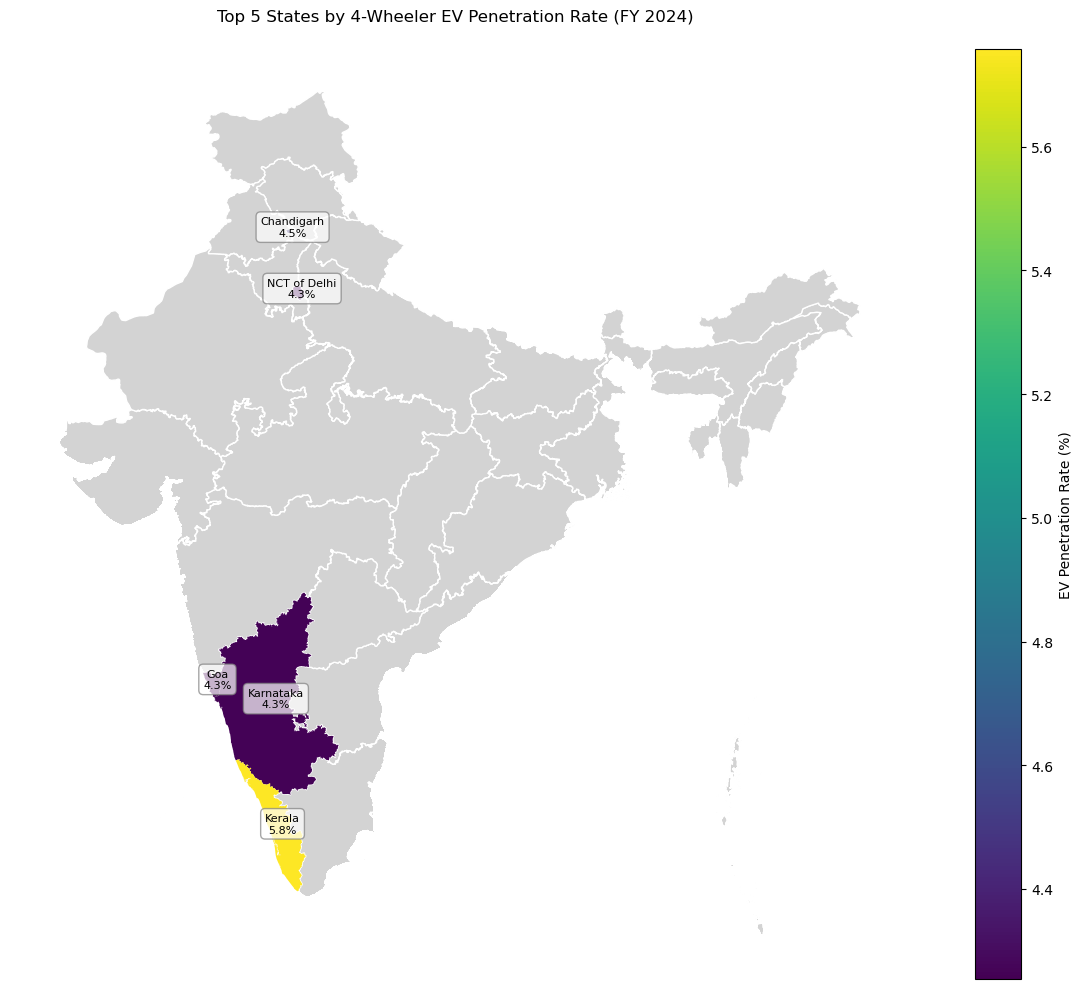

In [ ]:
# 1. Create the mapping dictionary from top_5_4w DataFrame
top_5_data = dict(
    zip(
        top_5_4w["state"].replace(
            {"Delhi": "NCT of Delhi"}
        ),  # Ensure names match the GeoData
        top_5_4w["penetration_rate"],
    )
)

# 2. Convert the dictionary back into a DataFrame for the function
import pandas as pd

top_5_df_for_plot = pd.DataFrame(
    list(top_5_data.items()), columns=["state", "penetration_rate"]
)

# 3. Use the function
plot_ev_penetration_map(
    top_states_df=top_5_df_for_plot,
    geo_file_path="../../data/external/gadm41_IND.gpkg",
    geo_layer="ADM_ADM_1",  # Change to your actual layer name if different
    geo_state_col="NAME_1",
    df_state_col="state",
    penetration_col="penetration_rate",
    title="Top 5 States by 4-Wheeler EV Penetration Rate (FY 2024)",
    cmap="viridis",
)